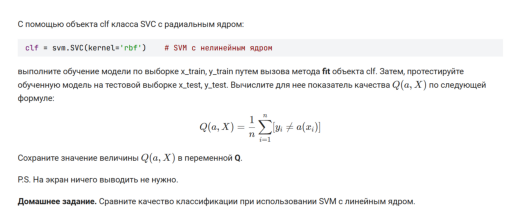

In [1]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('../img/4_3_2.png')  # Загрузите изображение, указав путь к файлу.
plt.imshow(img)  # Отобразите изображение.
plt.axis('off')  # Отключите отображение осей.
plt.show()

In [6]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

np.random.seed(0)

# исходные параметры распределений классов
r1 = 0.6
D1 = 3.0
mean1 = [1, -2]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.5
D2 = 2.0
mean2 = [-2, -1]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

# моделирование обучающей выборки
N = 500
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

data_x = np.hstack([x1, x2]).T
data_y = np.hstack([np.ones(N) * -1, np.ones(N)])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.4, shuffle=True)

clf = svm.SVC(kernel='rbf')    # SVM с нелинейным ядром
clf.fit(x_train, y_train)
predict = clf.predict(x_test)
Q = np.mean(predict != y_test)

clf_lin = svm.SVC(kernel='linear')    # SVM с нелинейным ядром
clf_lin.fit(x_train, y_train)
predict = clf_lin.predict(x_test)
Q_lin = np.mean(predict != y_test)
Q, Q_lin

(0.08, 0.0875)